In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [4]:
%load_ext autoreload
%autoreload 2
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/models")

from ternary_w_interactions import ternary_seg_profile
from scipy import constants

In [5]:
# check the input materials properties
ternary_seg_profile?


Init signature:
ternary_seg_profile(
    D0_C,
    Q_C,
    E_seg_C,
    D0_B,
    Q_B,
    E_seg_B,
    c0_C,
    c0_B,
    L_AB,
    L_AC,
    L_ABC,
    L_BC,
    T,
    d,
    nd,
    dt,
    nt,
)
Docstring:      <no docstring>
Init docstring:
A class to calculate the segregation profiles as a function of time for a ternary system. 
The ternary system is represented as A-B-C, where A is solvent, B is solute #1, and C is solute #2.

...

Attributes
----------
D0_B and D0_C: 1d array
    diffusion coefficients of solute B and C, have the same length as the number of layers $nd$
Q_B and Q_C : 1d array
    diffusion energy barriers of solute B and C, have the same length as the number of layers $nd$
E_seg_B and E_seg_C: 1d array
    segregation energies of solute B and C, have the same length as the number of layers $nd$
c0_C and c0_B: floats 
    initial solute concentrations between [0,1]
L_AB,L_AC,L_ABC, and L_BC: floats
    solute-solute interaction energies


T: float
    tempera

In [6]:
# Grid and time step parameters
data_Ni = pd.read_json('../data/Ni_221_flip_E.json')
# 
b = 2.5e-10 #m
a = np.sqrt(2)*b
d = a/np.sqrt(3)
d = b
nd = 100

# segregation parameters
T = 873 #K

# C: Co

c0_C = 0.05

D0_C = 5e-6 #m^2/s
Q_C = 241 #kJ/mol

E_seg_list_C = np.zeros(nd)
E_seg_list_C[0] = data_Ni['Co'][0]
E_seg_list_C[1] = data_Ni['Co'][1]
E_seg_list_C[2] = data_Ni['Co'][2]
E_seg_list_C[3] = data_Ni['Co'][3]
E_seg_list_C[4] = data_Ni['Co'][4]


Q_list_C = np.random.normal(loc=Q_C,scale=5,size=nd)

# B: Cr
c0_B = 0.05

D0_B = 5e-4 #m^2/s
Q_B = 285 #kJ/mol

E_seg_list_B = np.zeros(nd)
E_seg_list_B[0] = data_Ni['Cr'][0]
E_seg_list_B[1] = data_Ni['Cr'][1]
E_seg_list_B[2] = data_Ni['Cr'][2]
E_seg_list_B[3] = data_Ni['Cr'][3]
E_seg_list_B[4] = data_Ni['Cr'][4]


Q_list_B = np.random.normal(loc=Q_B,scale=5,size=nd)


# time
dt = 1  # time step size /s
nt = 5000  # number of time steps


In [7]:
# solute-solute interaction energies
J2eV = 8.617333262145e-5/1.380649e-23
NA = constants.Avogadro

# data from https://doi.org/10.1016/j.calphad.2015.12.007
# Cr in Ni # FCC
L_AB = (+8030-12.8801*T) * J2eV /NA

# Co in Ni # FCC
L_AC = (-800+1.2629*T) * J2eV /NA

# Co-Cr in Ni # FCC
L_ABC = (-40710+13.5334*T) * J2eV /NA

# Co-Cr
L_BC = (+1500-9.592*T) * J2eV/NA


In [9]:
system = ternary_seg_profile(D0_C,Q_C, # 1d array, same length as nd
           E_seg_list_C,# 1d array, same length as nd
           D0_B,Q_B, # 1d array, same length as nd
           E_seg_list_B,# 1d array, same length as nd
           c0_C,c0_B,
           L_AB,L_AC,L_ABC,L_BC,
           T,
           d,
           nd, 
           dt,
           nt)


In [10]:
system.tabulate_calc_res()

/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:270: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_B_layer_{i}'] = self.X_layers_B_vs_t.T[i]
/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:273: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_C_layer_{i}'] = self.X_layers_C_vs_t.T[i]


In [11]:
# take a look at the data
system.calc_data

,time(s),x_B_layer_0,x_B_layer_1,x_B_layer_2,x_B_layer_3,x_B_layer_4,x_B_layer_5,x_B_layer_6,x_B_layer_7,x_B_layer_8,...,x_C_layer_90,x_C_layer_91,x_C_layer_92,x_C_layer_93,x_C_layer_94,x_C_layer_95,x_C_layer_96,x_C_layer_97,x_C_layer_98,x_C_layer_99
0,0.0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
1,1.0,0.049889,0.051327,0.048995,0.049840,0.049949,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
2,2.0,0.049898,0.052398,0.048169,0.049640,0.049897,0.049997,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
3,3.0,0.049995,0.053275,0.047483,0.049414,0.049842,0.049992,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
4,4.0,0.050156,0.054000,0.046908,0.049171,0.049782,0.049985,0.049999,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4996.0,0.080990,0.079752,0.051504,0.048385,0.047780,0.047844,0.047869,0.047897,0.047928,...,0.049917,0.049927,0.049936,0.049945,0.049954,0.049963,0.049973,0.049982,0.049991,0.05
4997,4997.0,0.080991,0.079753,0.051504,0.048385,0.047781,0.047844,0.047869,0.047897,0.047928,...,0.049917,0.049927,0.049936,0.049945,0.049954,0.049963,0.049973,0.049982,0.049991,0.05
4998,4998.0,0.080991,0.079753,0.051504,0.048385,0.047781,0.047844,0.047869,0.047898,0.047928,...,0.049917,0.049927,0.049936,0.049945,0.049954,0.049963,0.049973,0.049982,0.049991,0.05
4999,4999.0,0.080992,0.079754,0.051504,0.048385,0.047781,0.047844,0.047870,0.047898,0.047928,...,0.049917,0.049927,0.049936,0.049945,0.049954,0.049963,0.049973,0.049982,0.049991,0.05


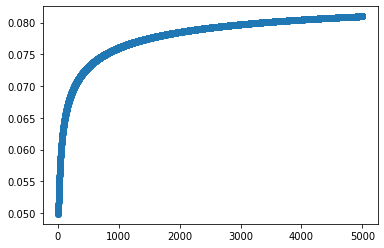

In [12]:
plt.scatter(system.calc_data['time(s)'],system.calc_data['x_B_layer_0'])

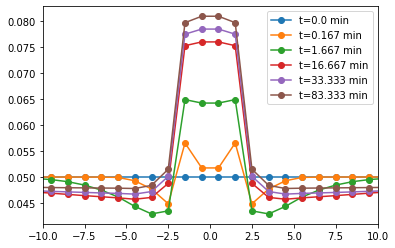

In [14]:
for i in [0,10,100,1000,2000,5000]:
    X_of_layers = np.hstack([system.X_layers_B_vs_t[i][::-1],system.X_layers_B_vs_t[i]])
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    plt.plot(n_layers,X_of_layers,'-o',
             label=f't={np.round(system.t[i]/60,3)} min')
    
plt.xlim(-10,10)
plt.legend()


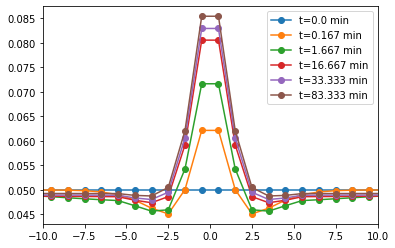

In [30]:
for i in [0,10,100,1000,2000,5000]:
    X_of_layers = np.hstack([system.X_layers_C_vs_t[i][::-1],system.X_layers_C_vs_t[i]])
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    plt.plot(n_layers,X_of_layers,'-o',
             label=f't={np.round(system.t[i]/60,3)} min')
    
plt.xlim(-10,10)
plt.legend()


In [21]:

b = 2.5e-10 #m
a = np.sqrt(2)*b
d = a/np.sqrt(3)
d = b
nd = 100

# segregation parameters
T = 873 #K

# C: Co

c0_C = 0.05

D0_C = 5e-6 #m^2/s
Q_C = 241 #kJ/mol

E_seg_list_C = np.zeros(nd)
E_seg_list_C[0] = data_Ni['Co'][0]
E_seg_list_C[1] = data_Ni['Co'][1]
E_seg_list_C[2] = data_Ni['Co'][2]
E_seg_list_C[3] = data_Ni['Co'][3]
E_seg_list_C[4] = data_Ni['Co'][4]


Q_list_C = np.random.normal(loc=Q_C,scale=5,size=nd)

# B: Cr
c0_B = 0.0

D0_B = 0#5e-4C#m^2/s
Q_B = 285 #kJ/mol

E_seg_list_B = np.zeros(nd)

Q_list_B = np.random.normal(loc=Q_B,scale=5,size=nd)


# time
dt = 1  # time step size /s
nt = 5000  # number of time steps


# solute-solute interaction energies
J2eV = 8.617333262145e-5/1.380649e-23
NA = constants.Avogadro

# data from https://doi.org/10.1016/j.calphad.2015.12.007
# Cr in Ni # FCC
#L_AB = (+8030-12.8801*T) * J2eV /NA

# Co in Ni # FCC
L_AC = (-800+1.2629*T) * J2eV /NA

# Co-Cr in Ni # FCC
L_ABC = 0#(-40710+13.5334*T) * J2eV /NA

# Co-Cr
L_BC = 0#(+1500-9.592*T) * J2eV/NA

system_AC = ternary_seg_profile(D0_C,Q_C, # 1d array, same length as nd
           E_seg_list_C,# 1d array, same length as nd
           D0_B,Q_B, # 1d array, same length as nd
           E_seg_list_B,# 1d array, same length as nd
           c0_C,c0_B,
           L_AB,L_AC,L_ABC,L_BC,
           T,
           d,
           nd, 
           dt,
           nt)

In [22]:
system_AC.tabulate_calc_res()

/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:270: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_B_layer_{i}'] = self.X_layers_B_vs_t.T[i]
/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:273: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_C_layer_{i}'] = self.X_layers_C_vs_t.T[i]


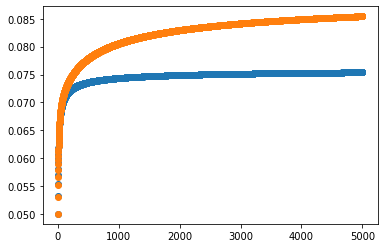

In [23]:
plt.scatter(system_AC.calc_data['time(s)'],system_AC.calc_data['x_C_layer_0'])
plt.scatter(system.calc_data['time(s)'],system.calc_data['x_C_layer_0'])


In [24]:

b = 2.5e-10 #m
a = np.sqrt(2)*b
d = a/np.sqrt(3)
d = b
nd = 100
a
# segregation parameters
T = 873 #K

# C: Co

c0_C = 0.05

D0_C = 5e-6 #m^2/s
Q_C = 241 #kJ/mol

E_seg_list_C = np.zeros(nd)
E_seg_list_C[0] = data_Ni['Co'][0]
E_seg_list_C[1] = data_Ni['Co'][1]
E_seg_list_C[2] = data_Ni['Co'][2]
E_seg_list_C[3] = data_Ni['Co'][3]
E_seg_list_C[4] = data_Ni['Co'][4]


Q_list_C = np.random.normal(loc=Q_C,scale=5,size=nd)

# B: Cr
c0_B = 0.0

D0_B = 0#5e-4 #m^2/s
Q_B = 285 #kJ/mol

E_seg_list_B = np.zeros(nd)

Q_list_B = np.random.normal(loc=Q_B,scale=5,size=nd)


# time
dt = 1  # time step size /s
nt = 5000  # number of time steps


# solute-solute interaction energies
J2eV = 8.617333262145e-5/1.380649e-23
NA = constants.Avogadro

# data from https://doi.org/10.1016/j.calphad.2015.12.007
# Cr in Ni # FCC
#L_AB = (+8030-12.8801*T) * J2eV /NA

# Co in Ni # FCC
L_AC = 0#(-800+1.2629*T) * J2eV /NA

# Co-Cr in Ni # FCC
L_ABC = 0#(-40710+13.5334*T) * J2eV /NA

# Co-Cr
L_BC = 0#(+1500-9.592*T) * J2eV/NA

# just the interaction energy 
system_AC_0 = ternary_seg_profile(D0_C,Q_C, # 1d array, same length as nd
           E_seg_list_C,# 1d array, same length as nd
           D0_B,Q_B, # 1d array, same length as nd
           E_seg_list_B,# 1d array, same length as nd
           c0_C,c0_B,
           L_AB,L_AC,L_ABC,L_BC,
           T,
           d,
           nd, 
           dt,
           nt)

In [26]:
system_AC_0.tabulate_calc_res()

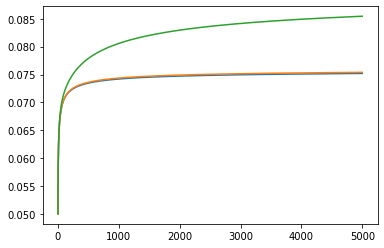

In [28]:
plt.plot(system_AC_0.calc_data['time(s)'],system_AC_0.calc_data['x_C_layer_0'])
plt.plot(system_AC.calc_data['time(s)'],system_AC.calc_data['x_C_layer_0'])
plt.plot(system.calc_data['time(s)'],system.calc_data['x_C_layer_0'])


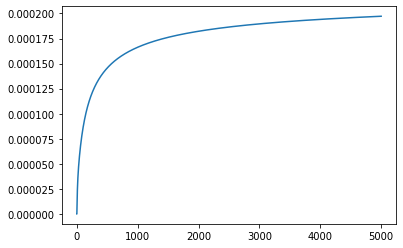

In [29]:

plt.plot(system_AC.calc_data['time(s)'],system_AC.calc_data['x_C_layer_0']-system_AC_0.calc_data['x_C_layer_0'])